# Import Library


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix

# Describing Data

In [2]:
df = pd.read_csv('df_final.csv')
df.head()

,label,ZCR,SC,RMSE,Chroma,Spectogram
0,0,0.064941,1578.844104,0.000266,0.908799,1.485587e-07
1,0,0.265137,5583.063834,0.024851,0.313661,1.469090e-02
2,0,0.017578,920.735578,0.040653,0.082109,2.302445e-01
3,0,0.017090,1247.986720,0.038109,0.678591,2.693205e-02
4,0,0.141113,4650.260829,0.014678,0.797511,5.623207e-04


In [3]:
df.shape

(606, 6)

In [4]:
df['label'].value_counts()

3    210
0    166
1    133
2     97
Name: label, dtype: int64

In [5]:
df.describe()

,label,ZCR,SC,RMSE,Chroma,Spectogram
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,1.579208,0.043476,1787.865012,0.048847,0.374684,2.118125
std,1.219469,0.039920,881.919650,0.058893,0.315918,32.041066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.023560,1294.490081,0.012330,0.103471,0.003175
50%,2.000000,0.033203,1622.777201,0.028819,0.285714,0.017022
75%,3.000000,0.049316,2005.960839,0.061624,0.573026,0.089709
max,3.000000,0.354980,7414.041580,0.424388,1.000000,736.865300


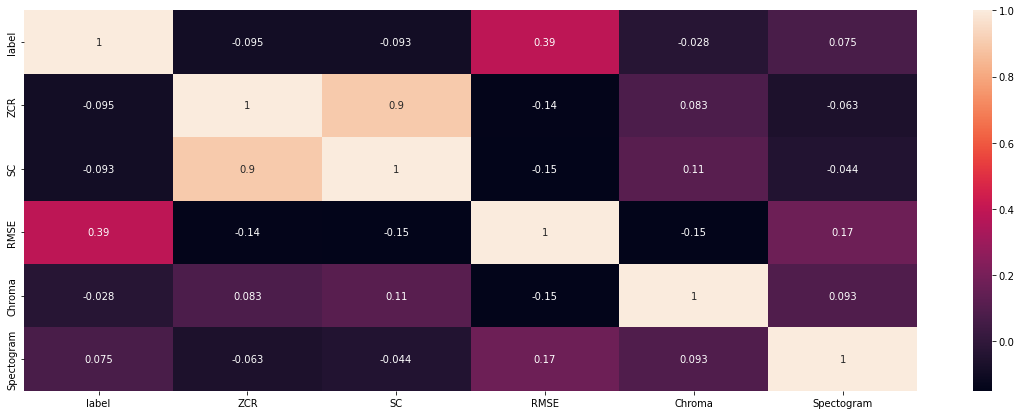

In [6]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Cleansing Data

In [7]:
df.duplicated().sum()

2

In [8]:
df.isnull().sum()

label         0
ZCR           0
SC            0
RMSE          0
Chroma        0
Spectogram    0
dtype: int64

In [9]:
df.dropna(thresh=4, inplace=True)
df.fillna(method='ffill', inplace=True)
df.drop_duplicates(inplace=True)

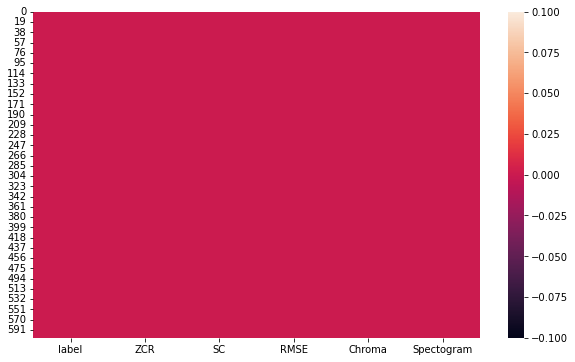

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

# Modelling

In [11]:
df_class_0 = df[df['label']==0]
df_class_1 = df[df['label']==1]
df_class_2 = df[df['label']==2]
df_class_3 = df[df['label']==3]

In [12]:
df_class_0.shape, df_class_1.shape, df_class_2.shape, df_class_3.shape

((166, 6), (133, 6), (97, 6), (208, 6))

In [13]:
df_class_0_over = df_class_0.sample(1500, replace=True)
df_class_1_over = df_class_1.sample(1500, replace=True)
df_class_2_over = df_class_2.sample(1500, replace=True)
df_class_3_over = df_class_3.sample(1500, replace=True)

In [14]:
df_final = pd.concat([df_class_0_over, df_class_1_over, df_class_2_over, df_class_3_over], axis=0)
df_final['label'].value_counts()

0    1500
1    1500
2    1500
3    1500
Name: label, dtype: int64

In [15]:
datax = df_final.drop(['label'],axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(datax)
y = df_final['label']

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4800, 5), (4800,), (1200, 5), (1200,))

In [17]:

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       300
           1       0.97      0.98      0.98       300
           2       0.98      0.98      0.98       300
           3       1.00      0.97      0.99       300

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



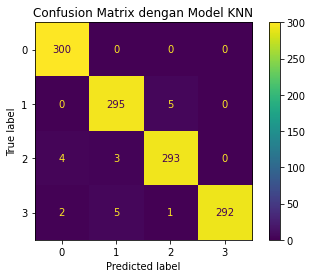

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix dengan Model KNN')
plt.show()